<a id="import"></a>
# <p style="background-color:DarkOrange; font-family:calibri; font-size:100%; color:white; text-align:center; border-radius:40px 10px; padding:15px">Import necessary libraries</p>

In [1]:
import matplotlib.pyplot as plt 
from PIL import Image
import torch
import torchvision.transforms as T
import torchvision
import numpy as np 
import cv2


### Load model

In [2]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:04<00:00, 34.6MB/s]


In [3]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [5]:
# ValueError: In training mode, targets should be passed
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [6]:
!wget -nv https://www.goodfreephotos.com/cache/other-photos/car-and-traffic-on-the-road-coming-towards-me.jpg -O traffic.jpg

2023-04-28 18:23:05 URL:https://www.goodfreephotos.com/cache/other-photos/car-and-traffic-on-the-road-coming-towards-me_800.jpg?cached=1522560655 [409997/409997] -> "traffic.jpg" [1]


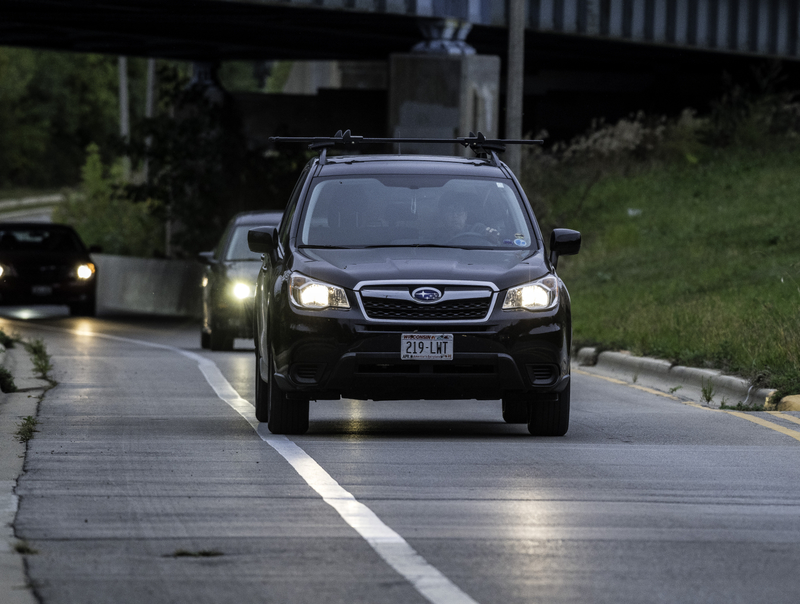

In [7]:
Image.open('traffic.jpg')

### Read Image

In [8]:
img = cv2.imread('traffic.jpg')
img_tensor = torchvision.transforms.ToTensor()(img)
img_tensor = img_tensor.unsqueeze(0)

### Eval model

In [9]:
model.eval()
with torch.no_grad():
    outputs = model(img_tensor)

### Label the Image

(-0.5, 799.5, 603.5, -0.5)

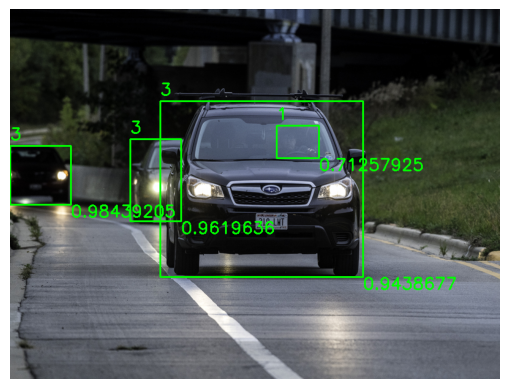

In [10]:
boxes = outputs[0]["boxes"]
labels = outputs[0]["labels"]
scores = outputs[0]["scores"]
for box, label, score in zip(boxes, labels, scores):
    box = box.detach().numpy().astype(int)
    label = label.detach().numpy()
    score = score.detach().numpy()
    if score > 0.5:
        cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
        cv2.putText(img, str(label), (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        cv2.putText(img, str(score), (box[2], box[3] + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [ ]:
from skimage.feature import hog
from sklearn.decomposition import PCA

# Extract object pixels and save as vector
boxes = outputs[0]["boxes"]
labels = outputs[0]["labels"]
scores = outputs[0]["scores"]
for i, (box, label, score) in enumerate(zip(boxes, labels, scores)):
    box = box.detach().numpy().astype(int)
    label = label.detach().numpy()
    score = score.detach().numpy()
    if score > 0.5:
        x1, y1, x2, y2 = box
        obj_img = img[y1:y2, x1:x2]
        gray = cv2.cvtColor(obj_img, cv2.COLOR_BGR2GRAY)
        features = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L2-Hys')
        features = PCA(n_components=1).fit_transform(features.reshape(1, -1))  # Reduce dimensionality of features
        np.save(f'object_{i}_features.npy', features)


### Load the npy files

In [ ]:
# Load the .npy file
features = np.load('object_0_features.npy')

# Print the contents of the array
print(features)

[[0.]]


### Save the npy files

In [ ]:
features = []
for obj_idx, obj_dict in enumerate(outputs):
    obj_features = []
    for feature_key, feature_val in obj_dict.items():
        if isinstance(feature_val, torch.Tensor):
            obj_features.append(feature_val.cpu().numpy())
    obj_features = np.concatenate(obj_features, axis=None)
    features.append(obj_features)
features = np.stack(features, axis=0)

np.save('features.npy', features)
